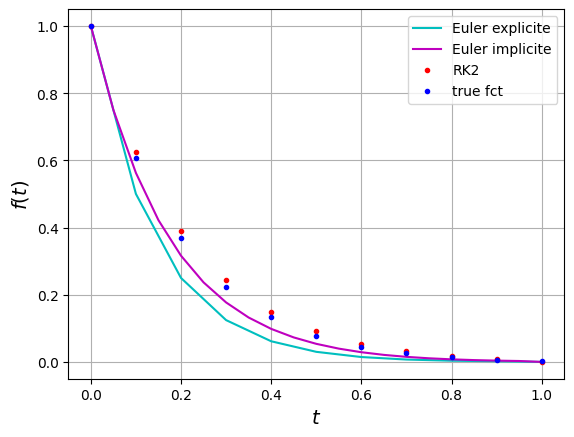

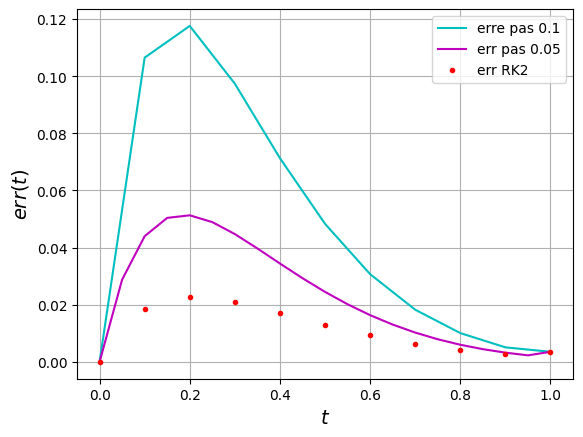

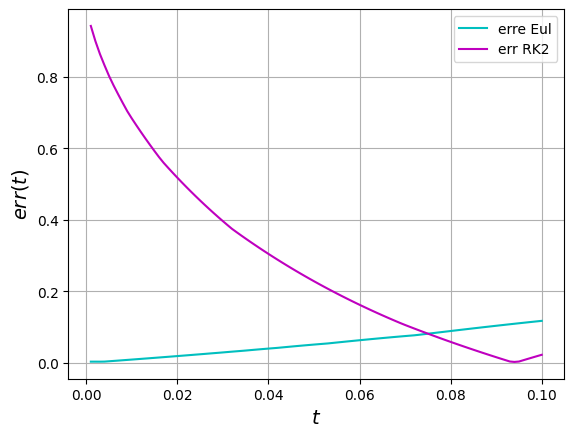

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t,y):
    return (t**3)*np.exp(-5*t)-(4*t**3+5)*y

def yExact(t):
    return (1/4)*(np.exp(t**4)+3)*np.exp(-t*(t**3+5))

def fct_Euler(y0, tmin, tmax, step, fonction):
    """
    Implémente la méthode d'Euler pour résoudre une équation différentielle y'(t) = f(t, y).

    Arguments :
    - y0 : condition initiale (valeur de y à t = tmin)
    - tmin : début de l'intervalle de temps
    - tmax : fin de l'intervalle de temps
    - step : pas de discrétisation
    - fonction : fonction f(t, y) définissant l'équation différentielle

    Retourne :
    - y : tableau des valeurs de y(t)
    - t : tableau des instants de temps
    """
    t = np.arange(tmin, tmax + step, step)
    y = np.zeros((len(t))) 
    y[0]=y0

    for k in range(1,len(t)-1):
        y[k]=y[k-1] + step*fonction(t[k-1],y[k-1])


    return y, t


def fct_RK2(y0, tmin, tmax, pas, beta, fonction):
    """
    Implémente la méthode de Runge-Kutta d'ordre 2 pour résoudre une équation différentielle y'(t) = f(t, y).

    Arguments :
    - y0 : condition initiale (valeur de y à t = tmin)
    - tmin : début de l'intervalle de temps
    - tmax : fin de l'intervalle de temps
    - pas : pas de discrétisation
    - beta : paramètre de la méthode RK2 (typique : beta=0.5 pour RK classique)
    - fonction : fonction f(t, y) définissant l'équation différentielle

    Retourne :
    - y : tableau des valeurs de y(t)
    - t : tableau des instants de temps
    """
    t = np.arange(tmin, tmax + pas, pas)
    y = np.zeros((len(t))) 
    y[0]=y0
    for k in range(1,len(t)-1):
        # Runge-Kutta d'ordre 2 (3 lignes de code)
        k1=fonction(t[k-1],y[k-1])
        k2=fonction(t[k-1]+h/(2*beta),y[k-1]+(h*k1)/(2*beta))
        y[k]=y[k-1]+h*((1-beta)*k1+beta*k2)
    
    return y, t

# condition initiale
y0=1
t_min = 0
t_max = 1

# méthode d'Euler avec 2 pas différents
h1 = 0.1
h2 = 0.05
yEuler1, t1 = fct_Euler(y0, t_min, t_max, h1, f)
yEuler2, t2 = fct_Euler(y0, t_min, t_max, h2, f)

# méthode de Runge-Kutta avec un pas de 0.1
h = 0.1
beta = 1
yRK, t3 = fct_RK2(y0, t_min, t_max, h, beta, f)

# calcul de l'erreur
eps1 = np.abs(yEuler1 - yExact(t1))
eps2 = np.abs(yEuler2 - yExact(t2))
eps3 = np.abs(yRK - yExact(t3))
yExact1=yExact(t3)

# affichage 1
plt.figure(1)
plt.plot(t1, yEuler1[:], 'c', label='Euler explicite')
plt.plot(t2, yEuler2[:], 'm', label='Euler implicite')
plt.plot(t3, yRK[:], 'r.', label='RK2')
plt.plot(t3, yExact1, 'b.', label='true fct')


lg = plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$f(t)$', fontsize=14)
plt.grid(True)

# affichage 2
plt.figure(2)
plt.plot(t1, eps1[:], 'c', label='erre pas 0.1')
plt.plot(t2, eps2[:], 'm', label='err pas 0.05')
plt.plot(t3, eps3[:], 'r.', label='err RK2')

lg = plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$err(t)$', fontsize=14)
plt.grid(True)

#affichahe 
hmin=0.001
hmax=0.1
hstep=0.001

hrange=np.arange(hmin,hmax+hstep,hstep)

erreul=np.zeros(hrange.size)
errrk=np.zeros(hrange.size)


for i in range(hrange.size):
    yEuler1, t1 = fct_Euler(y0, t_min, t_max, hrange[i], f)
    yRK, t3 = fct_RK2(y0, t_min, t_max, hrange[i], beta, f)

    erreul[i]=max(np.abs(yEuler1 - yExact(t1)))
    errrk[i]=max(np.abs(yRK - yExact(t3)))



# affichage 3
plt.figure(3)
plt.plot(hrange, erreul, 'c', label='erre Eul')
plt.plot(hrange, errrk, 'm', label='err RK2')

lg = plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$err(t)$', fontsize=14)
plt.grid(True)